In [1]:
import utils

# Miller OTA - Signal Ranges

## Single Ended Miller OTA Schematic

The Miller OTA circuit is constructed using the MOSbius Chip, simulated in LTspice, and measured using ADI's ADALM2000. **The schematic is shown below** — drawn in LTspice using the custom Mobius Library.

![image](img/invamp-mota-schem-ltspice.png)
<!-- <br>
<p align="center">
  <img src="./img/invamp-mota-schem-ltspice.png" alt="Mobius Miller OTA Breadboard Configuration" width="700">
</p> -->

<p align="center">
  <b><i>Figure 1:</b> MOSbius Miller OTA Schematic</i>
</p>


## Non-Inverting Amplifier in Unity Gain 

The Miller OTA is configured through external negative feedback as a non-inverting unity gain amplifier. the amplifier schematic used in the testbench is shown below. The ADALM2000 connections for supply voltage (V+), input waveform generator (W1), and input (1+) and output (2+) voltage measurements *(1- and 2- are connected to ground)* are annotated on the schematic.

![image](img/ninv-unitygain-mota-tb-schem.png)
<!-- <br>
<p align="center">
  <img src="img/ninv-unitygain-mota-tb-schem.png" alt="Mobius Miller OTA Breadboard Configuration" width="700">
</p>-->

<p align="center">
  <b><i>Figure 1:</b> Non-Inverting Unity Gain Amplifier Schematic with ADALM2000 Connections</i>
</p>

The OTA supply voltage *VDD* is generated by the ADALM2000's positive supply voltage *V+*. A bias current of 100uA is generated through *Rib* connected to *VDD*. Frequency compensation is achieved through the miller components *Rm* and *Cm*. The input waveform generator is set to a 1kHz, 2.5Vpp, 1.25V offset, triangle wave. 

### Show the resulting column heads of the constructed DataFrame

In [3]:
# Read the .txt file data (time-domain DC transfer) into a pandas dataframe
import pandas as pd

def read_txt_to_df(file_path):
    df = pd.read_csv(file_path, sep="\s+", header=0)
    return df

# Usage:
df1 = read_txt_to_df('data/scopyosc-tran-trianglein-vin-vout-xysetttings.txt')
df2 = read_txt_to_df('data/scopyosc-tran-trianglein-vin-vssdiffpair-xysetttings.txt')
df3 = read_txt_to_df('data/scopyosc-tran-trianglein-vin-vd-vpdiffpair-xysetttings.txt')
df4 = read_txt_to_df('data/scopyosc-tran-trianglein-vin-vd-vndiffpair-xysetttings.txt')

df1 = df1.rename(columns={'CH2(V)': 'V(2+)'})
df2 = df2.rename(columns={'CH2(V)': 'V(ss_diffpair)'})
df3 = df3.rename(columns={'CH2(V)': 'V(vd_diffpair_p)'})
df4 = df4.rename(columns={'CH2(V)': 'V(vd_diffpair_n)'})
dfs_scopy = [df1, df2, df3, df4]
df_scopy = df1.copy()

for df in dfs_scopy[1:]:
    df_scopy = df_scopy.merge(df, on=['Sample', 'Time(S)', 'CH1(V)'])


df_scopy.drop('Sample', axis=1, inplace=True)
df_scopy.rename(columns={'Time(S)': 'time', 'CH1(V)': 'V(1+)'}, inplace=True)
print(df_scopy.head())

df_spice = read_txt_to_df('data/LTspice-ninv-unitygain-trianglewave-ivall.txt')

# add a new col to df_spice which is all of col index 6 i col index 7 and anme it 'Iout'
df_spice['Iout'] = df_spice.iloc[:, 6] - df_spice.iloc[:, 8]
print(df_spice.head())


       time     V(1+)    V(2+)  V(ss_diffpair)  V(vd_diffpair_p)  \
0 -0.001587  1.353840  1.37571        0.357104           1.67006   
1 -0.001558  1.208110  1.23453        0.246286           1.67310   
2 -0.001541  1.126140  1.15104        0.185565           1.67310   
3 -0.001532  1.077560  1.10398        0.156722           1.67461   
4 -0.001512  0.977368  1.00834        0.100554           1.67310   

   V(vd_diffpair_n)  
0           1.65640  
1           1.66095  
2           1.66854  
3           1.67461  
4           1.69890  
           time         V(1+)     V(2+)  V(vost1)  V(x1:bus01)  V(x1:bus03)  \
0  0.000000e+00 -3.532471e-09  0.451164  1.585346     1.965576     0.000530   
1  7.029191e-09  2.895481e-05  0.451163  1.585335     1.963620     0.000373   
2  2.108757e-08  9.707855e-05  0.451160  1.585342     1.961052     0.000294   
3  3.649636e-08  1.755434e-04  0.451157  1.585351     1.959848     0.000293   
4  5.556087e-08  2.698697e-04  0.451154  1.585354     1.959509  

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/9x/tml1q_3d2qqdmxkz9dmvt1xh0000gn/T/ipykernel_26789/3911239137.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep="\s+", header=0)


## DC-Transfer Characteristics from Transient Measurements

### Plot the I-V data for a triangular input waveform
* **Scopy Measurements**
    * *Generate a 1kHz triangular waveform ranging from 0V - 2.5V on W1* 
    
        * Measure the input and output voltage on 1+ and 2+, respectively
        * Measure the voltage at the drains of the first stage's differential pair on 1+ and 2+
        * Measure the voltage at  the drain of the first stage's tail current source on 1+

* **LTspice Simulation**
    * *Simulate the transient response of the Miller OTA for the same 1kHz triangular input*
    
        * *Voltage Plots*
            * Plot the input and output voltage vs time
            * Plot the voltage at the drains of the first stage's differential pair vs time
            * Plot the voltage at  the drain of the first stage's tail current source vs time
        * *Current Plots*
            * Plot the current through the first stage's tail and differential pair transistors vs time
            * Plot the second stage current pulled by the bias and pushed by the common source transistors vs time
            * Plot the output current vs time



### Simulated I-V Waveforms vs. Time

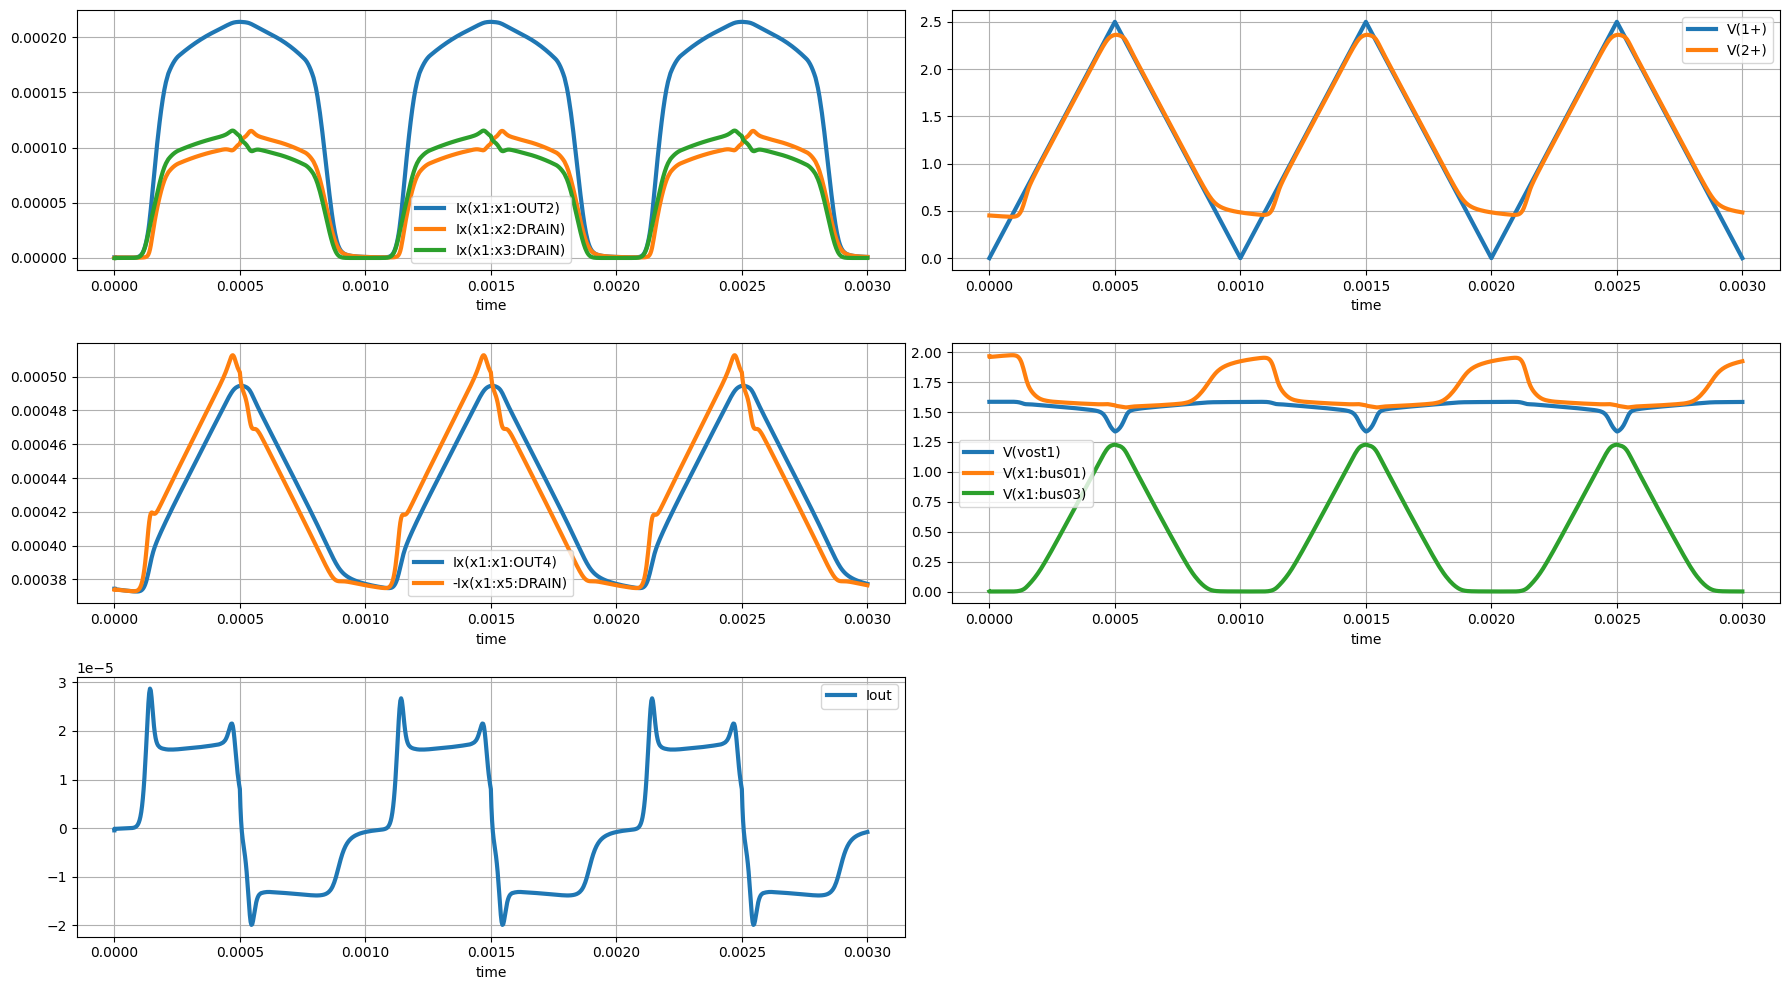

In [4]:
# plot transient dc transfer characteristics as y(t) vs time
col_groups = [
    ['time', 'Ix(x1:x1:OUT2)', 'Ix(x1:x2:DRAIN)', 'Ix(x1:x3:DRAIN)'],
    ['time', 'V(1+)', 'V(2+)'], 
    ['time', 'Ix(x1:x1:OUT4)', '-Ix(x1:x5:DRAIN)'],
    ['time', 'V(vost1)',  'V(x1:bus01)',  'V(x1:bus03)'],
    ['time', 'Iout']
    ]
# Call the function
utils.plotdf_subplots(df_spice, col_groups, (3,2), [2, 18], marker='None')

### Measured Voltage Waveforms vs. Time

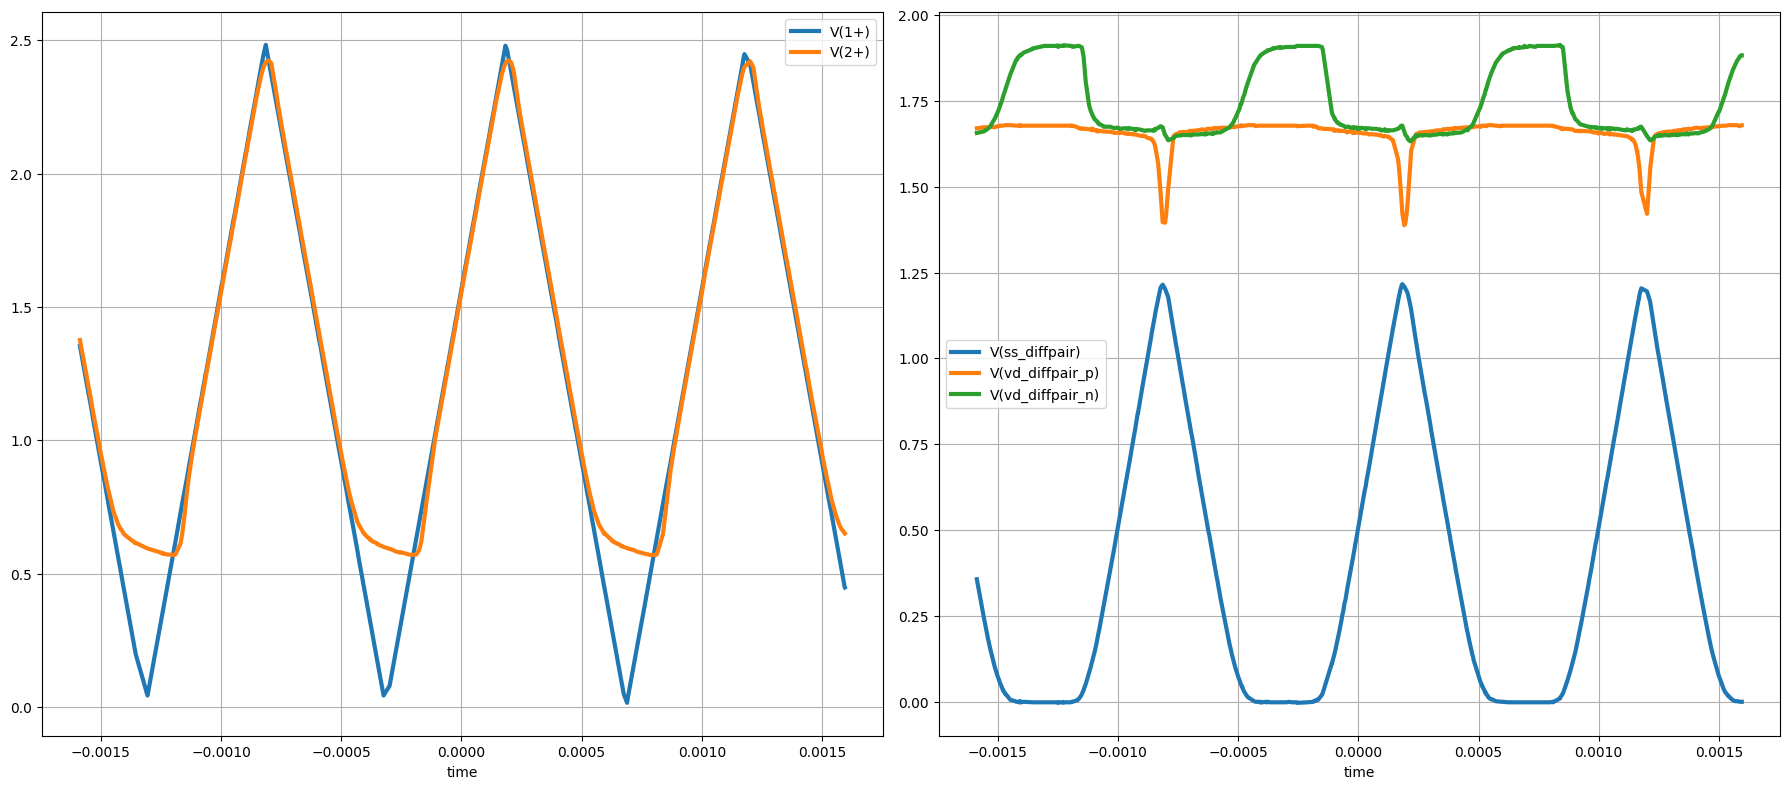

In [5]:
# plot transient dc transfer characteristics as y(t) vs time
col_groups = [
    ['time', 'V(1+)', 'V(2+)'], 
    ['time', 'V(ss_diffpair)',  'V(vd_diffpair_p)',  'V(vd_diffpair_n)'],
    ]
# Call the function
utils.plotdf_subplots(df_scopy, col_groups,(1,2), [4,18], marker='None')

### Simulated Waveforms vs. Input Voltage

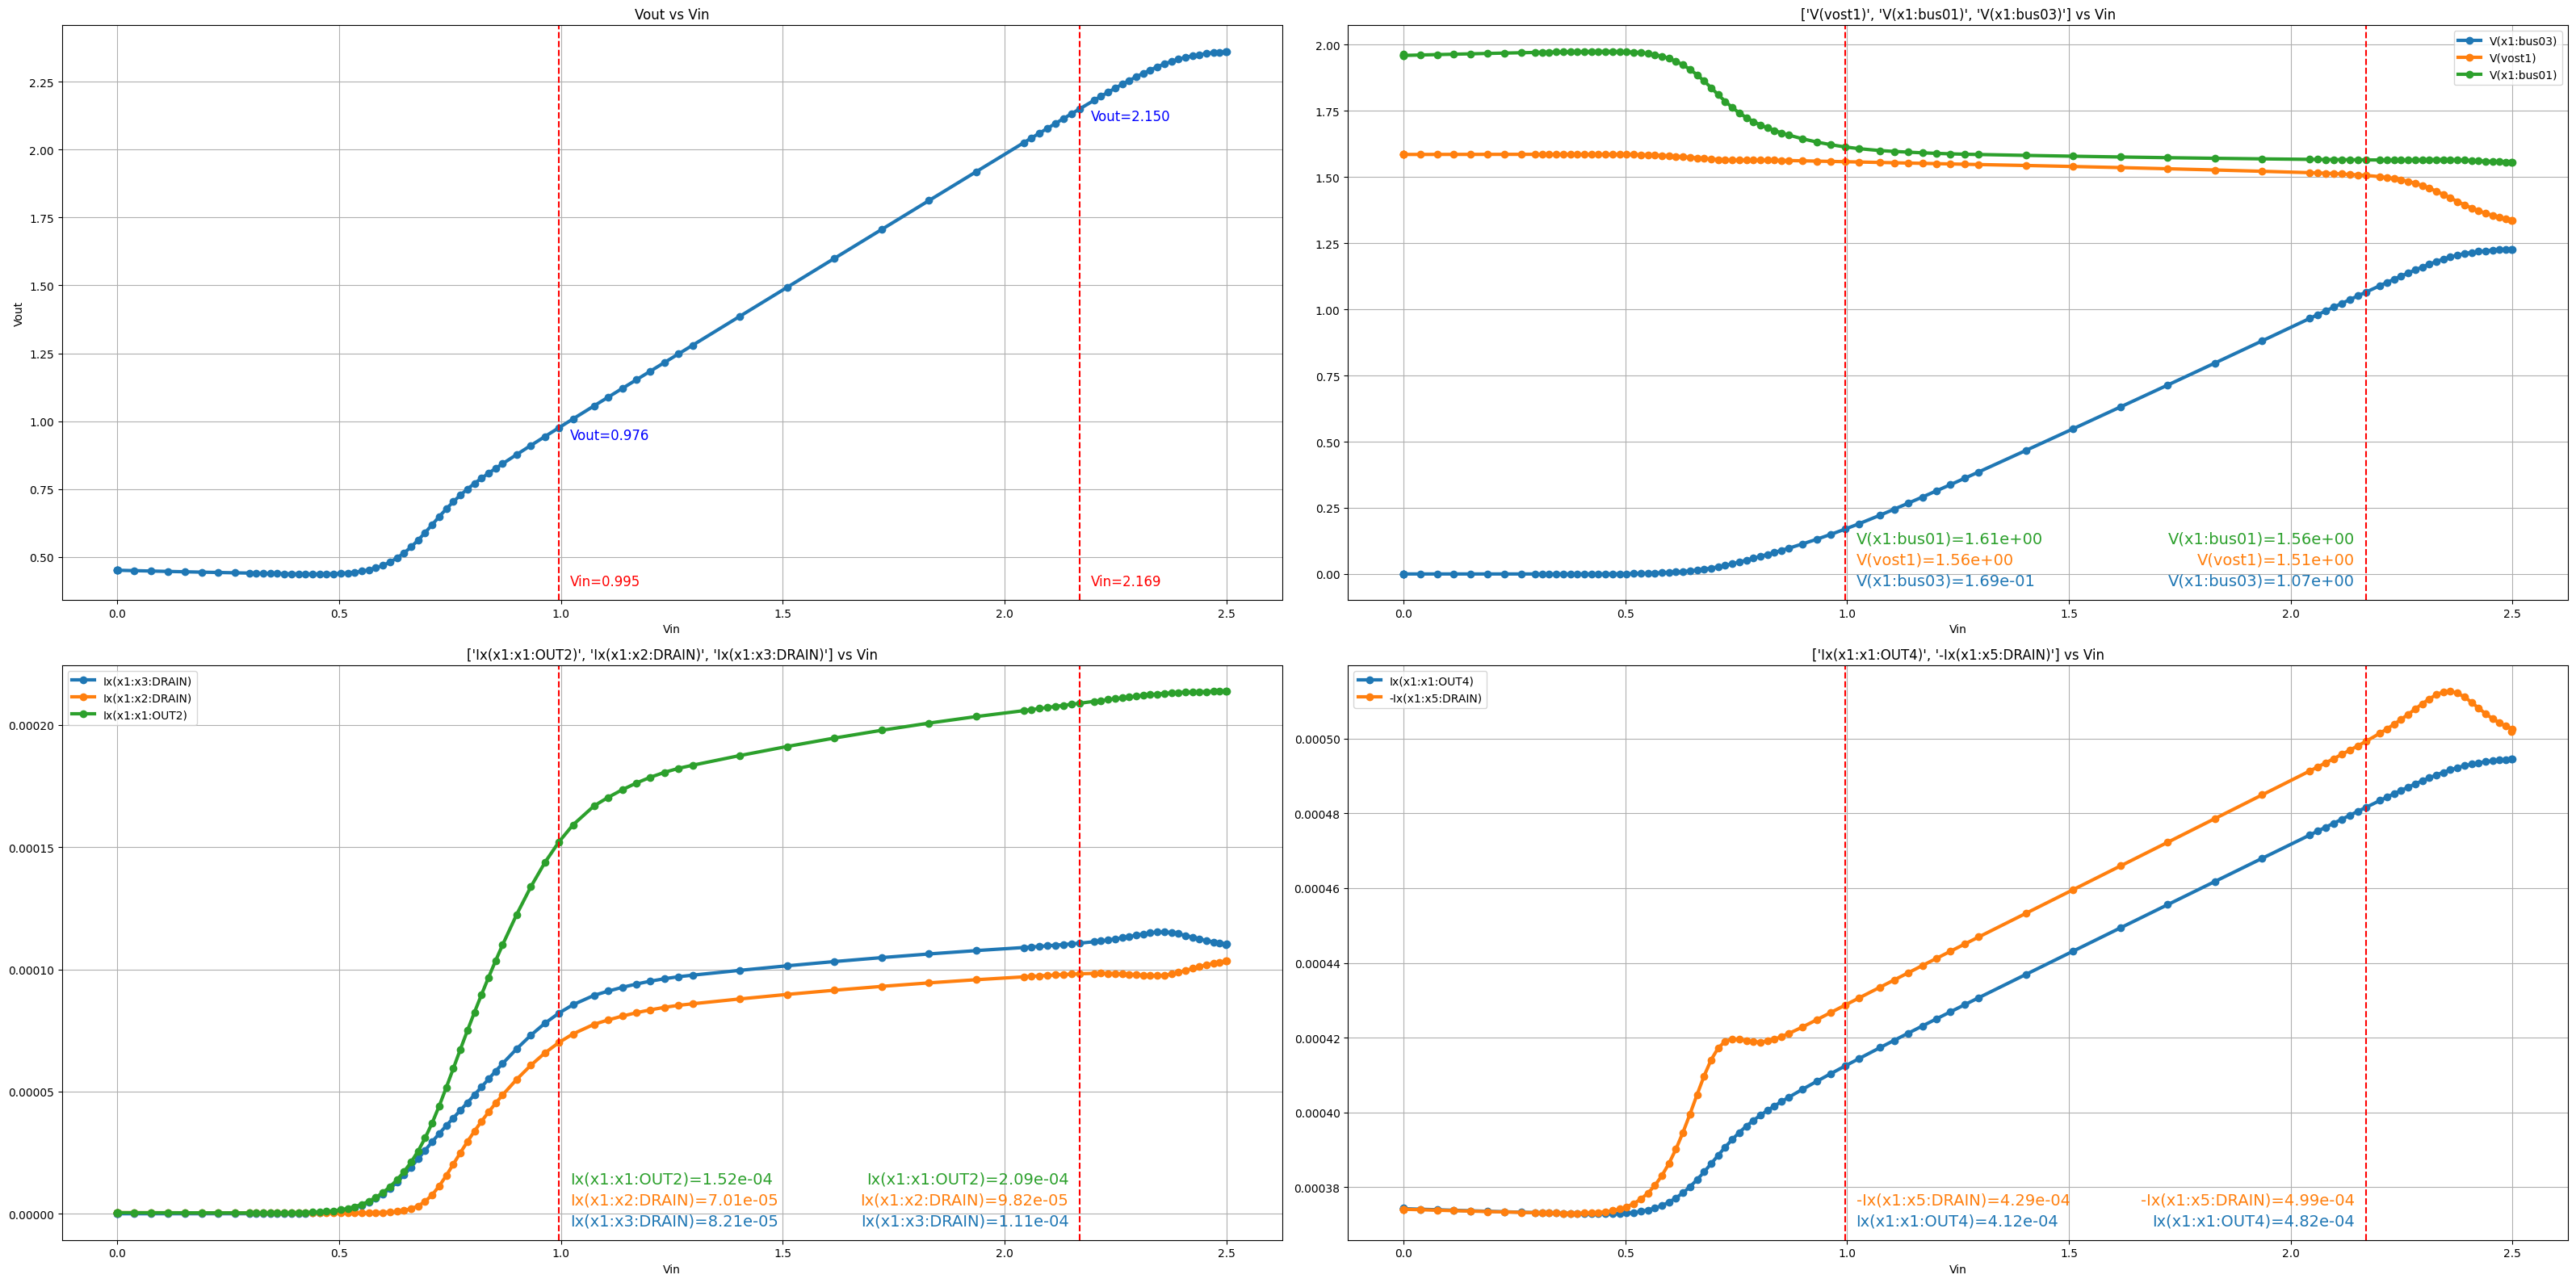

In [6]:
# plot transient dc transfer characteristics as y(t) vs x(t)
other_cols = [
   ["V(vost1)", "V(x1:bus01)", "V(x1:bus03)"],
   ["Ix(x1:x1:OUT2)", "Ix(x1:x2:DRAIN)", "Ix(x1:x3:DRAIN)"],
   ["Ix(x1:x1:OUT4)", "-Ix(x1:x5:DRAIN)"],
]
lower_bound_index, upper_bound_index = utils.plotdf_dctransfer_from_tran(
   df_spice, 
   2, 
   "V(1+)", 
   "V(2+)", 
   4, 
   other_cols, 
   (2, 2)
)


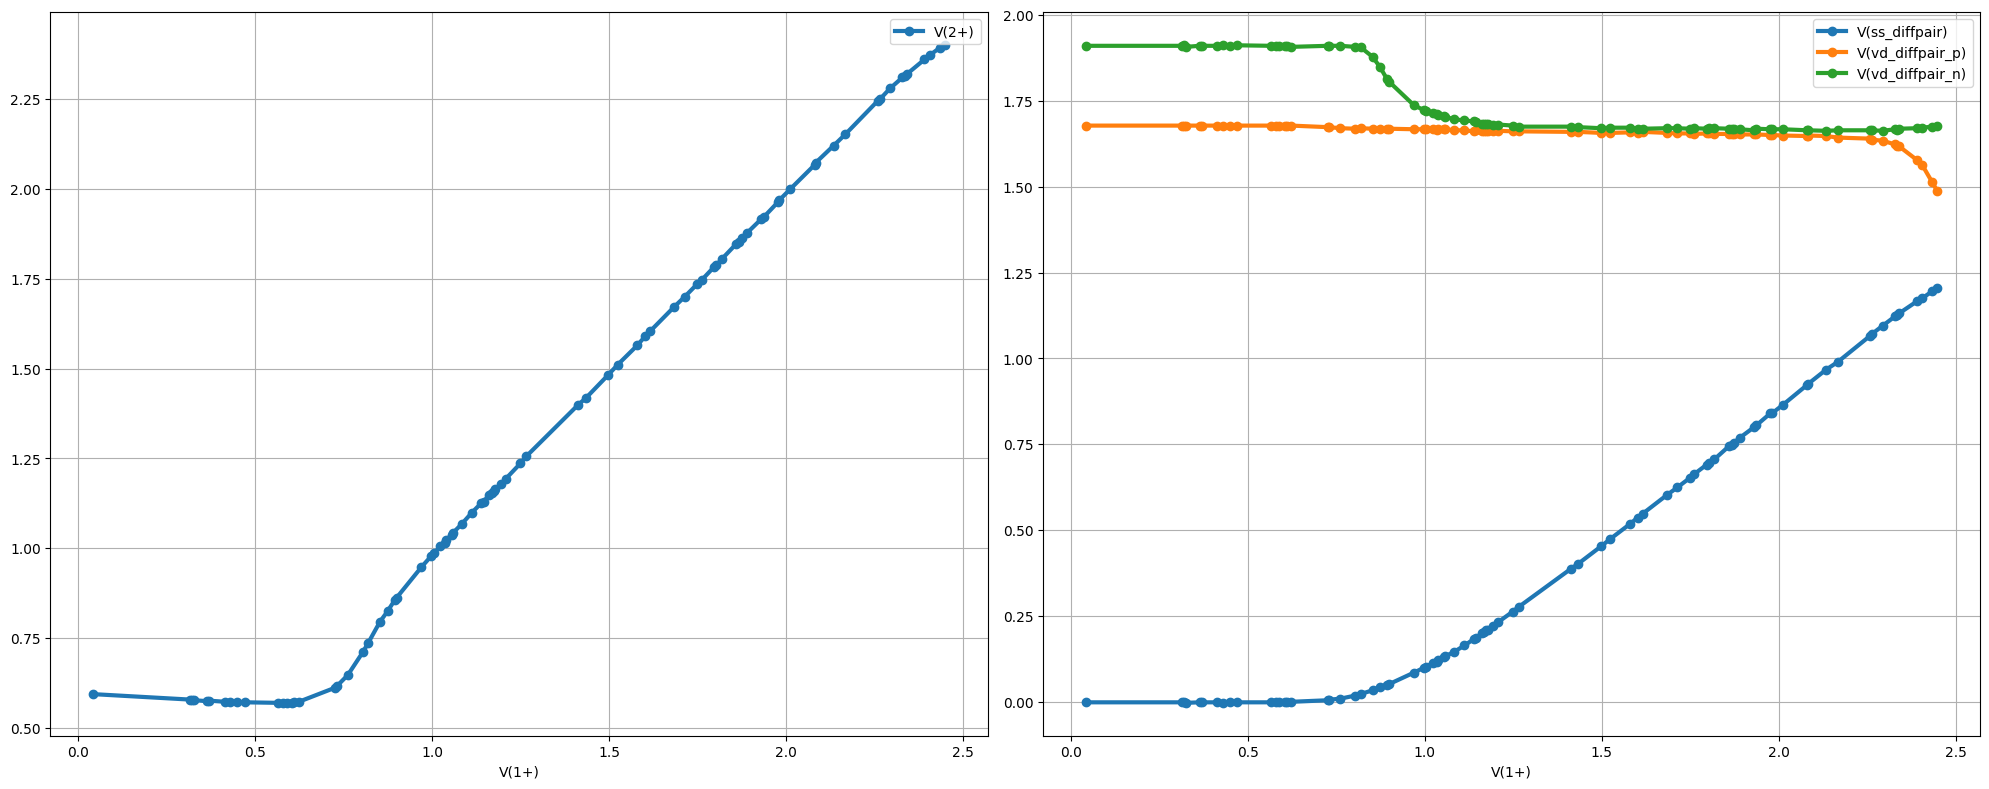

In [7]:
# plot transient dc transfer characteristics as y(t) vs time
df_scopy_1period = utils.subset_df_by_derivative(df_scopy, 'time', 'V(1+)')
col_groups = [
    ['V(1+)', 'V(2+)'], 
    ['V(1+)', 'V(ss_diffpair)',  'V(vd_diffpair_p)',  'V(vd_diffpair_n)'],
    ]
# print(df_scopy_1period.head())
utils.plotdf_subplots(df_scopy_1period, col_groups, (1,2), [4,20], marker='o', linestyle='-')

